In [1]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
import pandas as pd
import matplotlib as mt

df = pd.read_csv("https://raw.githubusercontent.com/coooodek/requestLog/refs/heads/main/dataset/processedData.csv", dtype={"분기": "int32", "연도": "int32"})

df['요청일'] = pd.to_datetime(df['요청일'])

In [4]:
df2 = df.groupby(['연도']).size()

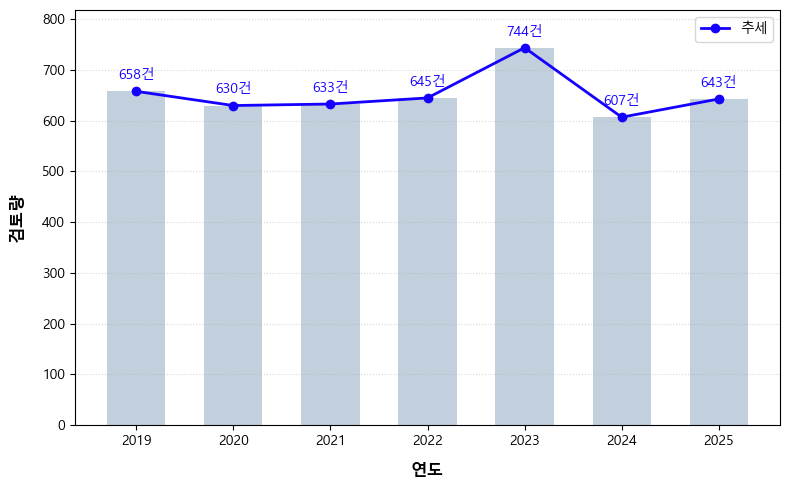

In [5]:
# 기술 검토 접수 건수 통계

plt.figure(figsize = (8,5))

plt.bar(df2.index, df2.values,
    width = 0.6,
    color = "#9ab0c699")

plt.plot(df2.index, df2.values,
    marker = 'o',
    color = "#1500ff",
    linewidth = 2,
    label = '추세')

for x, y in zip(df2.index, df2.values):
    plt.text(x, y + 18, f'{y}건',
             ha='center',
             va='bottom',
             color = "#1500ff")

plt.xlabel('연도', fontsize = 12, labelpad = 11, fontweight = 'bold')
plt.ylabel('검토량', fontsize = 12, labelpad = 11, fontweight = 'bold')
plt.ylim(0, (df2.values.max()) * 1.1) 

plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

In [6]:
output = (df.groupby(['제품그룹', '연도']).size().unstack(fill_value=0))

In [7]:
output

연도,2019,2020,2021,2022,2023,2024,2025
제품그룹,,,,,,,
A,5,2,3,10,15,12,22
B,23,26,21,30,33,16,27
C,34,33,49,27,28,30,36
D,25,39,52,42,39,44,38
E,104,98,111,94,132,102,131
ETC,8,4,4,5,0,1,6
F,9,12,9,15,7,27,25
G,70,57,47,80,82,57,67
H,9,9,9,6,4,18,8


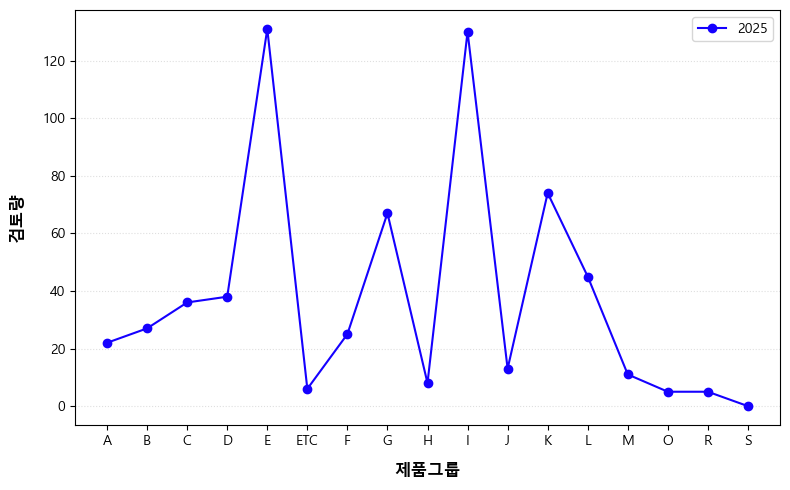

In [8]:
plt.figure(figsize=(8, 5))

for year in output.columns[-1:]:
    plt.plot(
        output.index,
        output[year],
        marker = 'o',
        linewidth = 1.5,
        color = "#1500ff",
        label = str(year)
    )

plt.xlabel('제품그룹', fontsize = 12, labelpad = 11, fontweight = 'bold')
plt.ylabel('검토량', fontsize = 12, labelpad = 11, fontweight = 'bold')

plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()

In [9]:
df[df['연도'] == 2019].담당자.unique()
df[df['연도'] == 2020].담당자.unique()
df[df['연도'] == 2021].담당자.unique()
df[df['연도'] == 2022].담당자.unique()
df[df['연도'] == 2023].담당자.unique()
df[df['연도'] == 2024].담당자.unique()
# df[df['연도'] == 2025].담당자.unique()

array(['노*경', '나*준', '박*호', '남*모', '권*태', '김*민', '이*호', '유*훈'],
      dtype=object)

In [10]:
df[(df['연도'] == 2025) & (df['담당자'] == '나*준')]

,기술검토번호,요청일,제품그룹,Location,담당자,분기,연도
8,ME25-680,2025-12-11 09:34:00,F,국내,나*준,4,2025
16,ME25-672,2025-12-03 17:20:00,G,국내,나*준,4,2025
24,ME25-664,2025-12-01 15:09:00,R,국내,나*준,4,2025
240,ME25-426,2025-07-07 16:56:00,G,수출,나*준,3,2025
255,ME25-408,2025-06-27 16:15:00,G,수출,나*준,2,2025
...,...,...,...,...,...,...,...
625,ME25-018,2025-01-15 16:55:00,R,국내,나*준,1,2025
629,ME25-014,2025-01-13 09:27:00,I,국내,나*준,1,2025
632,ME25-011,2025-01-08 15:22:00,I,국내,나*준,1,2025
640,ME25-003,2025-01-06 09:22:00,F,국내,나*준,1,2025


In [11]:
dfnew = pd.read_csv("https://raw.githubusercontent.com/coooodek/request-log/refs/heads/main/dataset/drwRequestLog.csv")

dfnew['요청일'] = pd.to_datetime(dfnew['요청일'])

In [12]:
dfnew['연도'] = dfnew['요청일'].dt.year

In [13]:
dfnew['분기'] = dfnew['요청일'].dt.quarter

In [14]:
dfnew2 = dfnew.groupby(['연도']).size()

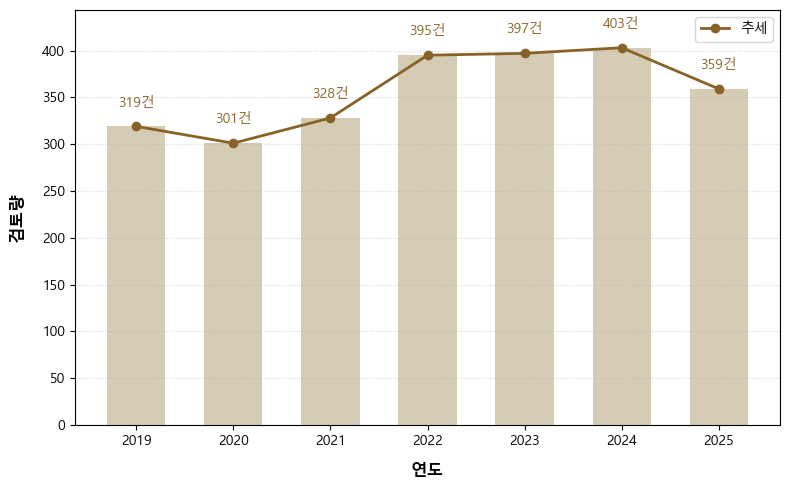

In [15]:
# 도면 요청서 접수 건수 통계

plt.figure(figsize = (8,5))

plt.bar(dfnew2.index, dfnew2.values,
    width = 0.6,
    color = "#c6b99ab7")

plt.plot(dfnew2.index, dfnew2.values,
    marker = 'o',
    color = "#886229",
    linewidth = 2,
    label = '추세')

for x, y in zip(dfnew2.index, dfnew2.values):
    plt.text(x, y + 18, f'{y}건',
             ha='center',
             va='bottom',
             color = "#886229")

plt.xlabel('연도', fontsize = 12, labelpad = 11, fontweight = 'bold')
plt.ylabel('검토량', fontsize = 12, labelpad = 11, fontweight = 'bold')
plt.ylim(0, (dfnew2.values.max()) * 1.1) 

plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

In [16]:
dfnew[dfnew['연도'] == 2025].담당자.unique()

array(['노*경', '남*모', '나*준', '김*민', '박*호', '권*태'], dtype=object)

In [17]:
dfnewoutput = (dfnew.groupby(['제품그룹', '연도']).size().unstack(fill_value=0))

In [18]:
dfnewoutput

연도,2019,2020,2021,2022,2023,2024,2025
제품그룹,,,,,,,
A,6,9,7,10,18,12,11
B,18,8,10,13,23,21,30
C,57,52,50,70,62,55,43
D,20,13,29,24,16,35,18
E,38,58,61,58,70,56,64
ETC,8,3,1,7,8,2,5
F,16,13,15,24,32,31,25
G,19,14,17,11,11,18,13
H,6,4,0,1,4,1,4


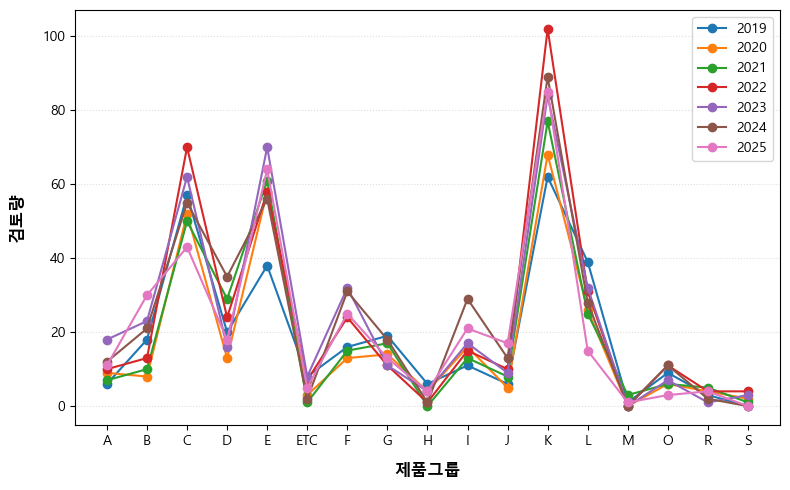

In [19]:
plt.figure(figsize=(8, 5))

for year in dfnewoutput.columns[:]:
    plt.plot(
        dfnewoutput.index,
        dfnewoutput[year],
        marker = 'o',
        linewidth = 1.5,
        #color = "#1500ff",
        label = str(year)
    )

plt.xlabel('제품그룹', fontsize = 12, labelpad = 11, fontweight = 'bold')
plt.ylabel('검토량', fontsize = 12, labelpad = 11, fontweight = 'bold')

plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
print(f'김영민 : {df[(df['담당자'] == '김*민') & (df['연도'] == 2025)].count()}')
print(f'박병호 : {df[(df['담당자'] == '박*호') & (df['연도'] == 2025)].count()}')
print(f'노예경 : {df[(df['담당자'] == '노*경') & (df['연도'] == 2025)].count()}')
print(f'나호준 : {df[(df['담당자'] == '나*준') & (df['연도'] == 2025)].count()}')
print(f'남준모 : {df[(df['담당자'] == '남*모') & (df['연도'] == 2025)].count()}')

남준모 : 기술검토번호      123
요청일         123
제품그룹        123
Location    123
담당자         123
분기          123
연도          123
dtype: int64
